In [ ]:
# import jupyterthemes as jt

# !jt -t chesterish

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)
# keys = get_keys("/Users/Johnny/.secret/yelp_api.json")
# api_key = keys['api_key']
# pip install tmdbsimple #Ctrl+? this line to install tmdbsimple
import tmdbsimple as tmdb
# tmdb.API_KEY = api_key

scrape = False

import ast
import time
import http.client, urllib.request, urllib.parse, urllib.error, base64

api_key = 'ceeaacb7cf024c7485e00ef8457e42dc'


# user = 'Drymander'

import pickle
from tqdm import tqdm

# pip install isodate

import isodate

In [2]:
#Standard python libraries
import pandas as pd
import seaborn as sns
# sns.set_context('talk')
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

# Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
scaler = StandardScaler()
from sklearn import metrics

# Models & Utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

# NLP Libraries
import nltk
import collections
# nltk.download('punkt')
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk import regexp_tokenize
import re
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from nltk import ngrams
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
# !pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pull Most Recent Match Details

This is a combination of two API calls - the first is to pull the latest match for a given player based on their gamertag.  This provides the Match ID, and the second API call pulls the data using the Match ID. 

In [3]:
# Prepare gamertag for API

def gamertag_for_api(gamertag):
    gamertag = gamertag.replace(' ','+')
    return gamertag

gamertag_for_api('this is a test')

'this+is+a+test'

In [4]:
def pull_recent_match(how_recent, api_key=api_key, explore=False, gamertag='Drymander'):
    
    gamertag = gamertag_for_api(gamertag)
    
    headers = {
        # Request headers
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
        # Request parameters
        'modes': 'arena',
        'start': how_recent,
        'count': 1,
        'include-times': True,
    })

    try:
        conn = http.client.HTTPSConnection('www.haloapi.com')
        conn.request("GET", f"/stats/h5/players/{gamertag}/matches?%s" % params, "{body}", headers)
        response = conn.getresponse()
        latest_match = json.loads(response.read())

        match_id = latest_match['Results'][0]['Id']['MatchId']

        time.sleep(1.1)

        conn.request("GET", f"/stats/h5/arena/matches/{match_id}?%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
        
        if explore == True:
            print(data)
        else:
            match_results = json.loads(data)
        conn.close()
    except Exception as e:
        print(f"[Errno {0}] {1}".format(e.errno, e.strerror))
    
    return match_results

####################################

# match_results = pull_recent_match(5, explore=True)
match_results = pull_recent_match(0, explore=False, gamertag='thefishhawk88')

# Pull Any Match

In [ ]:
# explore = True
# matchId = '0bbc809c-87d8-423f-88a4-ffb9fc782fd6'

# def pull_match(matchId, api_key=api_key, explore=False):

#     headers = {
#         # Request headers
#         'Ocp-Apim-Subscription-Key': api_key,
#     }

#     params = urllib.parse.urlencode({
#     })

#     try:
#         conn = http.client.HTTPSConnection('www.haloapi.com')
#         conn.request("GET", f"/stats/h5/arena/matches/{matchId}?%s" % params, "{body}", headers)
#         response = conn.getresponse()
#         if explore == True:
#             data = response.read()
#             print(data)
#         else:
#             data = response.read()
#             data = json.loads(data)
#         conn.close()
#     except Exception as e:
#         print(f"[Errno {0}] {1}".format(e.errno, e.strerror))
    
#     return data

        
# pull_match('0bbc809c-87d8-423f-88a4-ffb9fc782fd6', explore=False)

# Build Match Dataframe

In [ ]:
match_results = pull_recent_match(0,explore=False)

### Notes

Red team is team ID 0

Blue team is team ID 1

In [5]:
# match_results = pull_recent_match(0, explore=False, gamertag='thefishhawk88')
def build_base_dataframe(match_results, gamertag):
    
    # Build empty base match dataframe
    df = pd.DataFrame()
    columns = [
        'TeamId',
        'Gamertag',
        'SpartanRank',
        'PrevTotalXP',
    ]
    df = pd.DataFrame(columns = columns)
    
    # Populate base match dataframe with player stats for each player
    i = 0
    for player in match_results['PlayerStats']:

        player_dic = {}
        # Team ID
        player_dic['TeamId'] = match_results['PlayerStats'][i]['TeamId']
        # Team Color
        player_dic['TeamColor'] = match_results['PlayerStats'][i]['TeamId']
        # Gamer Tag
        player_dic['Gamertag'] = match_results['PlayerStats'][i]['Player']['Gamertag']
        # Spartan Rank
        player_dic['SpartanRank'] = match_results['PlayerStats'][i]['XpInfo']['SpartanRank']
        # Previous Total XP
        player_dic['PrevTotalXP'] = match_results['PlayerStats'][i]['XpInfo']['PrevTotalXP']
        df = df.append(player_dic, ignore_index=True)
        i += 1
    
    playerteam = df.loc[df['Gamertag'] == gamertag, 'TeamId'].values[0]
    if playerteam == 0:
        enemyteam = 1
    else:
        enemyteam = 0

    if match_results['TeamStats'][0]['TeamId'] == playerteam:
        playerteam_stats = match_results['TeamStats'][0]
        enemyteam_stats = match_results['TeamStats'][1]
    else: 
        playerteam_stats = match_results['TeamStats'][1]
        enemyteam_stats = match_results['TeamStats'][0]
    
    # Determine winner
    # Tie
    if playerteam_stats['Rank'] == 1 and enemyteam_stats['Rank'] == 1:
        df['Winner'] = 'Tie'
    # Player wins
    elif playerteam_stats['Rank'] == 1 and enemyteam_stats['Rank'] == 2:
        df['Winner'] = df['TeamId'].map({playerteam:'Victory', enemyteam:'Defeat'})
    # Enemy wins
    elif playerteam_stats['Rank'] == 2 and enemyteam_stats['Rank'] == 1:
        df['Winner'] = df['TeamId'].map({enemyteam:'Victory', playerteam:'Defeat'})
    # Error handling
    else:
        winner = 'Error determining winner'
    df['TeamColor'] = df['TeamId'].map({0:'Red', 1:'Blue'})
    # Set columns
    df = df[['TeamId', 'Winner', 'TeamColor', 'Gamertag', 'SpartanRank', 'PrevTotalXP']]
    # Sort match by winning team
    df = df.sort_values(by=['Winner'], ascending=False)
    
    return df

# df = build_base_dataframe(pull_recent_match(0))
# # df.loc[df['TeamId'] == 0]
# df
# build_base_dataframe(pull_recent_match(0, explore=False, gamertag='thefishhawk88'), gamertag='thefishhawk88')

,TeamId,Winner,TeamColor,Gamertag,SpartanRank,PrevTotalXP
1,1,Victory,Blue,William PO2,113,4090626
2,1,Victory,Blue,Orion II Fred,58,1163661
4,1,Victory,Blue,FIAB Atheon,105,3500010
5,1,Victory,Blue,Lilcountry6981,140,6448461
0,0,Defeat,Red,BladiSsj4045,94,2809071
3,0,Defeat,Red,Saracenwarrior1,84,2413548
6,0,Defeat,Red,HungTaiLung,68,1625143
7,0,Defeat,Red,thefishhawk88,145,7927665


In [ ]:
# playerteam = 0

# df['TeamColor'] = df['TeamId'].map({0:'Red', 1:'Blue'})
# df['Winner'] = df['TeamId'].map({playerteam:'Victory', 1:'Defeat'})
# df

In [ ]:
# # Red victory
# build_base_dataframe(pull_recent_match(0, gamertag='thefishhawk88'), gamertag='thefishhawk88')

In [ ]:
# # Blue loss
# build_base_dataframe(pull_recent_match(1, gamertag='thefishhawk88'), gamertag='thefishhawk88')

In [ ]:
# # Blue tie
# build_base_dataframe(pull_recent_match(2, gamertag='thefishhawk88'), gamertag='thefishhawk88')

In [ ]:
# # Red victory
# build_base_dataframe(pull_recent_match(3, gamertag='thefishhawk88'), gamertag='thefishhawk88')

In [ ]:
# # Red DNF
# build_base_dataframe(pull_recent_match(6, gamertag='thefishhawk88'))

In [ ]:
# # Blue victory
# build_base_dataframe(pull_recent_match(7))

# Pull Game Base Variant Stats for All Players in Match

Using the match details, we will compile everyone's gamertags into a list and pull more specific information for each player.  We can get statistics on every game mode (or "Game Base Variant" as it is referred to in the API).

## Player List

In [6]:
# df_match = build_base_dataframe(pull_recent_match(5, gamertag='thefishhawk88'), gamertag='thefishhawk88')

def get_player_list(df):
    player_list = str(list(df['Gamertag']))[1:-1]

    player_list
    player_list = player_list.replace(', ',',')
    player_list = player_list.replace("'",'')
    player_list = player_list.replace(' ','+')

    return player_list


# get_player_list(df_match)


In [7]:
def get_player_history(df):
    headers = {
        # Request headers
        'Ocp-Apim-Subscription-Key': str(api_key),
    }
    params = urllib.parse.urlencode({
    })
    player_list_api = get_player_list(df)
    try:
        conn = http.client.HTTPSConnection('www.haloapi.com')
        conn.request("GET", f"/stats/h5/servicerecords/arena?players={player_list_api}&%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
        player_history = json.loads(data)
    #     print(data)
        conn.close()
    except Exception as e:
        print(f"[Errno {0}] {1}".format(e.errno, e.strerror))

    return player_history

# player_history = get_player_history(df_match)

# player_history['Results'][1]

## Compile Individual Stats into Dataframe

In [ ]:
player_history['Results'][2]

In [8]:
# variant_id = match_results['GameBaseVariantId']

def build_history_dataframe(player_history, variant_id):
    vdf_columns = [
        'Gamertag',
        'TotalTimePlayed',
        'K/D',
        'Accuracy',
        'WinRate',
    ]

    vdf = pd.DataFrame(columns = vdf_columns)

    i = 0
    for player in player_history['Results']:
        for variant in player['Result']['ArenaStats']['ArenaGameBaseVariantStats']:
            if variant['GameBaseVariantId'] == variant_id:
                variant_stats = variant

        variant_dic = {}
        variant_dic['Gamertag'] = player_history['Results'][i]['Id']
        variant_dic['TotalTimePlayed']= isodate.parse_duration(variant_stats['TotalTimePlayed']).total_seconds() / 3600
        variant_dic['K/D'] = variant_stats['TotalKills'] / variant_stats['TotalDeaths']
        variant_dic['Accuracy'] = variant_stats['TotalShotsLanded'] / variant_stats['TotalShotsFired']
        variant_dic['WinRate'] = variant_stats['TotalGamesWon'] / variant_stats['TotalGamesLost']
        vdf = vdf.append(variant_dic, True)

        i += 1
        
    return vdf
    
# build_history_dataframe(player_history, variant_id)

# Merge Match and Game Variant Dataframes

In [ ]:
# df_stats = pd.merge(df_match, vdf, how='inner', on = 'Gamertag')

# df_stats

# Master Function

In [9]:
# gamertag = 'Drymander'

def recent_match_stats(gamertag, back_count=0):
    match_results = pull_recent_match(back_count, explore=False, gamertag=gamertag)
    base_df = build_base_dataframe(match_results, gamertag=gamertag)
    time.sleep(1.01)
    
    player_list = get_player_list(base_df)
    
    player_history = get_player_history(base_df)
    
    history_df = build_history_dataframe(player_history, match_results['GameBaseVariantId'])
    full_stats_df = pd.merge(base_df, history_df, how='inner', on = 'Gamertag')
    
    return full_stats_df
#     return base_df, history_df, player_list, player_history, full_stats_df
# base_df, history_df, player_list, player_history, full_stats_df = recent_match_stats('thefishhawk88', back_count=20)

stats_df = recent_match_stats('ATLkrunk420', back_count=0)

In [65]:
# df = recent_match_stats('Drymander', back_count=0)
df.sort_values

,TeamId,Winner,TeamColor,Gamertag,SpartanRank,PrevTotalXP,TotalTimePlayed,K/D,Accuracy,WinRate
0,0,Victory,Red,My F4CE,149,23804362,515.634651,1.383889,0.319825,1.963398
1,0,Victory,Red,MainEduardo14,149,21657325,319.466274,1.553110,0.394439,1.858225
2,0,Victory,Red,The Oz Man 187,146,9638446,268.192600,1.236409,0.358494,1.917772
3,0,Victory,Red,Delrose10,112,4063074,104.639527,1.009991,0.368061,0.992701
4,1,Defeat,Blue,CornyPacman100,150,29968891,320.816100,1.026461,0.349958,0.971471
5,1,Defeat,Blue,CAD corruptfile,152,56247976,1712.001644,1.154261,0.365456,1.038706
6,1,Defeat,Blue,tecksue,144,7368853,187.382065,1.128046,0.342161,1.104348
7,1,Defeat,Blue,Drymander,148,15297468,292.844357,1.026727,0.320677,0.996756


In [48]:
df.to_csv('match.csv')

df

,TeamId,Winner,TeamColor,Gamertag,SpartanRank,PrevTotalXP,TotalTimePlayed,K/D,Accuracy,WinRate
0,1,Victory,Blue,NOpeekingDonald,147,12459398,456.592071,1.251471,0.374676,0.981502
1,1,Victory,Blue,Nutzmann,151,37330390,808.399906,1.337044,0.389528,1.256020
2,1,Victory,Blue,ElasticWhisper7,149,18251255,595.876977,0.988238,0.323790,0.952705
3,1,Victory,Blue,frozTyr,148,15016579,480.642340,0.972129,0.355592,1.199535
4,0,Defeat,Red,Temoneous,149,23826914,904.733138,1.173478,0.388986,1.075825
5,0,Defeat,Red,Drymander,148,15236993,291.370283,1.026345,0.320813,0.995110
6,0,Defeat,Red,Coctel de Fruta,148,17814844,361.705901,0.992527,0.443723,1.006786
7,0,Defeat,Red,BumerChief,149,21567103,725.463310,1.116188,0.377319,0.898177


# Plotting Graphs

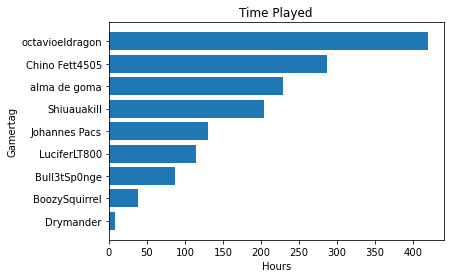

In [73]:
df = recent_match_stats('Drymander', back_count=1)
df

fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.6)

ax = plt.axes()
ax.set_facecolor("white")
# OR

plt.barh( df['Gamertag'], df['TotalTimePlayed'].sort_values())

# setting label of y-axis
plt.ylabel("Gamertag")
  
# setting label of x-axis
plt.xlabel("Hours") 
plt.title("Time Played")
plt.show()

In [69]:
import plotly.express as px
# df = df
fig = px.bar(df, x='TotalTimePlayed', y='Gamertag', orientation='h')
fig.show()

In [74]:
df = recent_match_stats('Drymander', back_count=0)

import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=df['TotalTimePlayed'],
            y=df['Gamertag'],
            orientation='h'))

fig.show()

# Streamlit

In [ ]:
# !pip install streamlit

# !pip install --upgrade protobuf

In [17]:
import streamlit as st

In [27]:
st.title('My first fdsfdsa app')

st.write("Here's our first attempt at using data to create a table:")
st.write(pd.DataFrame({
    'first column': [1, 2, 3, 4],
    'second column': [10, 20, 30, 40]
    }))

In [28]:
chart_data = pd.DataFrame(
     np.random.randn(20, 3),
     columns=['a', 'b', 'c'])

st.line_chart(chart_data)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

# Unused Code

In [ ]:
for variant in players_stats['Results'][0]['Result']['ArenaStats']['ArenaGameBaseVariantStats']:
    if variant['GameBaseVariantId'] == variant_id:
        variant_stats = variant
    else:
        continue
        
variant_stats['TotalKills']

## All stats

In [ ]:
# pip install isodate

import isodate

variant_dic = {}
variant_dic['Gamertag'] = players_stats['Results'][0]['Id']
variant_dic['TotalTimePlayed']= isodate.parse_duration(variant_stats['TotalTimePlayed']).total_seconds() / 3600
variant_dic['K/D'] = variant_stats['TotalKills'] / variant_stats['TotalDeaths']
variant_dic['Accuracy'] = variant_stats['TotalShotsLanded'] / variant_stats['TotalShotsFired']
variant_dic['WinRate'] = variant_stats['TotalGamesWon'] / variant_stats['TotalGamesLost']

variant_dic

In [ ]:
vdf.append(variant_dic, ignore_index=True)

## Additional Player History Stats

In [ ]:
# variant_dic['TotalHeadshots']= variant_stats['TotalHeadshots']
# variant_dic['TotalWeaponDamage']= variant_stats['TotalWeaponDamage']
# variant_dic['TotalShotsFired']= variant_stats['TotalShotsFired']
# variant_dic['TotalShotsLanded']= variant_stats['TotalShotsLanded']
# variant_dic['TotalMeleeKills']= variant_stats['TotalMeleeKills']
# variant_dic['TotalMeleeDamage']= variant_stats['TotalMeleeDamage']
# variant_dic['TotalAssassinations']= variant_stats['TotalAssassinations']
# variant_dic['TotalGroundPoundKills']= variant_stats['TotalGroundPoundKills']
# variant_dic['TotalGroundPoundDamage']= variant_stats['TotalGroundPoundDamage']
# variant_dic['TotalShoulderBashKills']= variant_stats['TotalShoulderBashKills']
# variant_dic['TotalShoulderBashDamage']= variant_stats['TotalShoulderBashDamage']
# variant_dic['TotalGrenadeDamage']= variant_stats['TotalGrenadeDamage']
# variant_dic['TotalPowerWeaponKills']= variant_stats['TotalPowerWeaponKills']
# variant_dic['TotalPowerWeaponDamage']= variant_stats['TotalPowerWeaponDamage']
# variant_dic['TotalPowerWeaponGrabs']= variant_stats['TotalPowerWeaponGrabs']
# variant_dic['TotalPowerWeaponPossessionTime']= isodate.parse_duration(variant_stats['TotalPowerWeaponPossessionTime']).total_seconds() / 3600
# variant_dic['TotalDeaths']= variant_stats['TotalDeaths']
# variant_dic['TotalAssists']= variant_stats['TotalAssists']
# variant_dic['TotalGamesCompleted']= variant_stats['TotalGamesCompleted']
# variant_dic['TotalGamesWon']= variant_stats['TotalGamesWon']
# variant_dic['TotalGamesLost']= variant_stats['TotalGamesLost']
# variant_dic['TotalGamesTied']= variant_stats['TotalGamesTied']
# variant_dic['TotalGrenadeKills']= variant_stats['TotalGrenadeKills']
# variant_dic['TotalKills']= variant_stats['TotalKills']

## Build base match dataframe from pull_recent_match

In [ ]:
match_results = pull_recent_match(2494)

i = 0

df_match = pd.DataFrame()
columns = [
    'TeamId',
    'Gamertag',
    'SpartanRank',
    'PrevTotalXP',
]
df_match = pd.DataFrame(columns = columns)

for player in match_results['PlayerStats']:

    player_dic = {}
    # Team ID
    player_dic['TeamId'] = match_results['PlayerStats'][i]['TeamId']
    # Gamer Tag
    player_dic['Gamertag'] = match_results['PlayerStats'][i]['Player']['Gamertag']
    # Spartan Rank
    player_dic['SpartanRank'] = match_results['PlayerStats'][i]['XpInfo']['SpartanRank']
    # Previous Total XP
    player_dic['PrevTotalXP'] = match_results['PlayerStats'][i]['XpInfo']['PrevTotalXP']
    df_match = df_match.append(player_dic, ignore_index=True)
    i += 1

# Define winner

playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

if match_results['TeamStats'][0]['TeamId'] == playerteam:
    playerteam_stats = match_results['TeamStats'][0]
    enemyteam_stats = match_results['TeamStats'][1]
else: 
    playerteam_stats = match_results['TeamStats'][1]
    enemyteam_stats = match_results['TeamStats'][0]

print(playerteam_stats['Rank'])
print(enemyteam_stats['Rank'])

# Tie
if playerteam_stats['Rank'] == 1 and enemyteam_stats['Rank'] == 1:
    winner = 'Tie'
# Player wins
elif playerteam_stats['Rank'] == 1 and enemyteam_stats['Rank'] == 2:
    winner = 'Player'
# Enemy wins
elif playerteam_stats['Rank'] == 2 and enemyteam_stats['Rank'] == 1:
    winner = 'Enemy'
# Error handling
else:
    winner = 'Error determining winner'

print(f'{winner} won the game')

df_match

## Player History Base Code

In [ ]:
vdf_columns = [
    'Gamertag',
    'TotalTimePlayed',
    'K/D',
    'Accuracy',
    'WinRate',
]

vdf = pd.DataFrame(columns = vdf_columns)

i = 0

for player in player_history['Results']:

    
    for variant in player['Result']['ArenaStats']['ArenaGameBaseVariantStats']:
        if variant['GameBaseVariantId'] == variant_id:
            variant_stats = variant
#         else:
#             continue
            
    variant_dic = {}
    variant_dic['Gamertag'] = player_history['Results'][i]['Id']
    variant_dic['TotalTimePlayed']= isodate.parse_duration(variant_stats['TotalTimePlayed']).total_seconds() / 3600
    variant_dic['K/D'] = variant_stats['TotalKills'] / variant_stats['TotalDeaths']
    variant_dic['Accuracy'] = variant_stats['TotalShotsLanded'] / variant_stats['TotalShotsFired']
    variant_dic['WinRate'] = variant_stats['TotalGamesWon'] / variant_stats['TotalGamesLost']
    vdf = vdf.append(variant_dic, True)
    
    i += 1
    
vdf

## Full Match Detail Function Diagnostics

In [ ]:
base_df

In [ ]:
player_list

In [ ]:
player_history['Results'][0]

In [ ]:
history_df # history DF not responding to back_count = 20

In [ ]:
full_stats_df

In [ ]:
# player_df_spartanrank = player_df.copy()

row_count = 0

for match in tqdm(match_details):
# for match in tqdm(mds):
    
#     try:
        data = match
        df_match = pd.DataFrame()
        columns = [
            'TeamId',
            'Gamertag',
            'SpartanRank',
            'PrevTotalXP',
        ]
        df_match = pd.DataFrame(columns = columns)
        i = 0

        if len(data['PlayerStats']) != 8:
            continue

        for player in data['PlayerStats']:

            player_dic = {}
            # Team ID
            player_dic['TeamId'] = data['PlayerStats'][i]['TeamId']
            if player_dic['TeamId'] not in (0, 1):
                continue
            # Gamer Tag
            player_dic['Gamertag'] = data['PlayerStats'][i]['Player']['Gamertag']
            # Spartan Rank
            player_dic['SpartanRank'] = data['PlayerStats'][i]['XpInfo']['SpartanRank']
            # Previous Total XP
            player_dic['PrevTotalXP'] = data['PlayerStats'][i]['XpInfo']['PrevTotalXP']
            df_match = df_match.append(player_dic, ignore_index=True)
            i += 1

            playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

            if data['TeamStats'][0]['Rank'] == 1:
                winner = 0
            else: winner = 1

            if winner == playerteam:
                player_win = 1
            else:
                player_win = 0
            
        player_df = df_match.loc[df_match['TeamId'] == playerteam]
        enemy_df = df_match.loc[df_match['TeamId'] != playerteam]

        row_list = []
        row_list.append(match['MatchId'])
        row_list.append(player_win)
        for row in range(len(player_df)):
            row_list.extend(list(player_df.iloc[row].values[1:]))
        for row in range(len(enemy_df)):
            row_list.extend(list(enemy_df.iloc[row].values[1:]))

        match_details_df.loc[row_count] = row_list
#         print(row_list)
        row_count += 1
 
#     except:
#         continue
    
match_details_df

## Jupyter Notebook Streamlit

In [32]:
! curl  https://scripts.christianfjung.com/JN-ST.sh | bash -s 'Single Match'

Thanks for using my script - checkout christianfjung.com for more. 
Takes 1 Argument: Name  of ipynb. To stop, CTRL-C in Terminal or Stop Button in JN. 


This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error an

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   291  100   291    0     0    434      0 --:--:-- --:--:-- --:--:--   434
[NbConvertApp] WARNING | pattern 'Single' matched no files
[NbConvertApp] WARNING | pattern 'Match.ipynb' matched no files
awk: fatal: cannot open file `Single' for reading (No such file or directory)
Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Invalid value: File does not exist: app.py


In [33]:
!jupyter nbconvert   --to script 'Single Match.ipynb'
!awk '!/ipython/' 'Single Match.py' >  temp.py && mv temp.py streamlit.py && rm streamlit.py
!streamlit run streamlit.py


This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too

[NbConvertApp] WARNING | pattern "'Single" matched no files
[NbConvertApp] WARNING | pattern "Match.ipynb'" matched no files
awk: fatal: cannot open file `Single Match.py' for reading (No such file or directory)


^C
